In [1]:
!pip install awswrangler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 159.6 MB/s eta 0:00:0000:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 19.0.0
    Uninstalling pyarrow-19.0.0:
      Successfully uninstalled pyarrow-19.0.0


In [2]:
# Libraries for AWS interactions
import boto3
import sagemaker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import awswrangler as wr

sns.set(style="whitegrid")

# Session, configuration, important to change in different account
bucket_name = "arxiv-project-bucket"
data_key = "arxiv-metadata-oai-snapshot.json"
role = "arn:aws:iam::221082214706:role/MYLabRole"
region = "us-east-1"

sess = sagemaker.Session(boto_session=boto3.Session(region_name=region))
print("SageMaker Session Bucket:", bucket_name)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[02/19/25 19:45:11] INFO     Found credentials from IAM Role:                                   ]8;id=121510;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=915174;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


[02/19/25 19:45:22] WARNING  Matplotlib is building the font cache; this may take a moment.    ]8;id=246473;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=89418;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py#1095\1095]8;;\

                    INFO     generated new fontManager                                         ]8;id=107086;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272038;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py#1639\1639]8;;\

[02/19/25 19:45:29] INFO     Found credentials from IAM Role:                                   ]8;id=620238;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=374329;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

SageMaker Session Bucket: arxiv-project-bucket


In [3]:
# Read ArXiv data using pipe_tools.py
# This way we can ingest the JSON file from S3 and clean it
from pipe_tools import get_arxiv_data, preprocess_arxiv_data

df_arxiv = get_arxiv_data(bucket_name, data_key)
print("Raw data shape:", df_arxiv.shape)
df_arxiv.head()

# Preprocess data
df_arxiv = preprocess_arxiv_data(df_arxiv)
print("Data after preprocessing:")
df_arxiv.head()

[02/19/25 19:45:30] INFO     Found credentials from IAM Role:                                   ]8;id=114962;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=325608;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=464215;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=967237;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

Raw data shape: (2647472, 14)
Data after preprocessing:


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,[hep-ph],None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,"[math.CO, cs.CG]",http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,[physics.gen-ph],None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,[math.CO],None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,"[math.CA, math.FA]",None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


/tmp/ipykernel_16817/3587719125.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


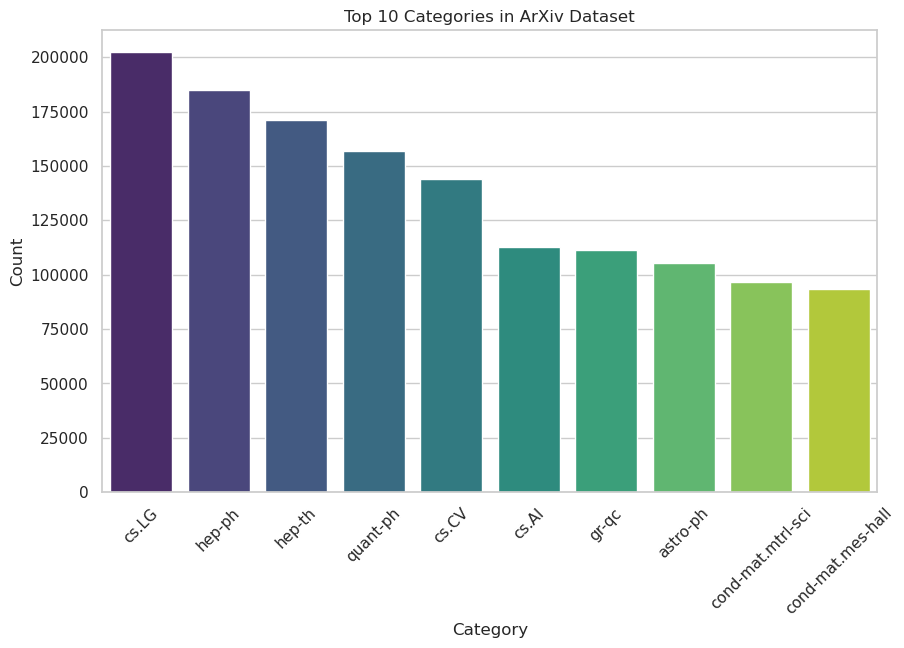

In [4]:
# Quick EDA of cateogires to view, frequency too
# Should add more EDA for requirements
if "categories" in df_arxiv.columns:
    all_categories = df_arxiv["categories"].explode()
    top_categories = all_categories.value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
    plt.title("Top 10 Categories in ArXiv Dataset")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipykernel_16817/2008638700.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.index, y=top_authors.values, palette="magma")


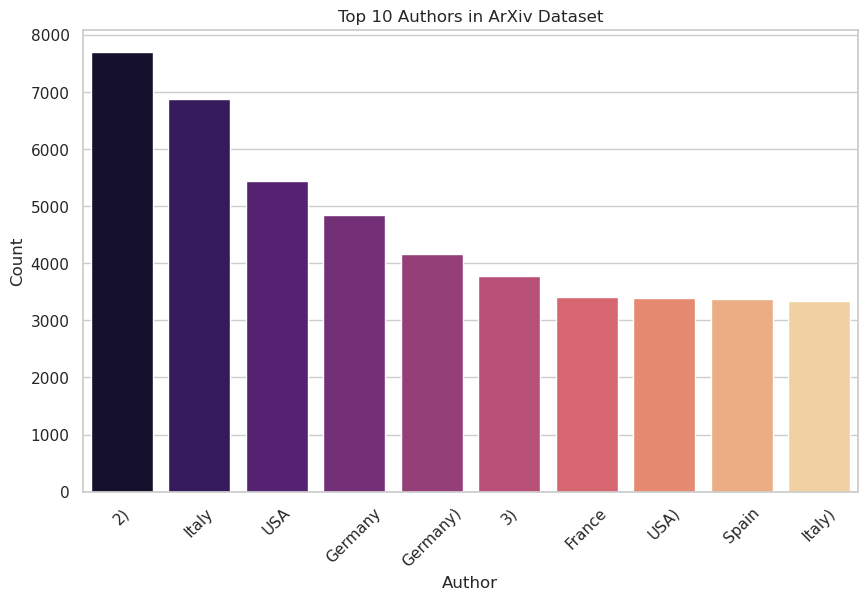

In [5]:
# EDA of top 10 authors, find more important ones
if "authors" in df_arxiv.columns:
    authors_series = df_arxiv["authors"].dropna().apply(lambda x: [a.strip() for a in x.split(",")])
    authors_exploded = authors_series.explode()
    top_authors = authors_exploded.value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_authors.index, y=top_authors.values, palette="magma")
    plt.title("Top 10 Authors in ArXiv Dataset")
    plt.xlabel("Author")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()